In [1]:
'''
dc - 1= 2, 3, 5, 7, 10, 20, 40, 60, 80, 100 
1. Скатывается ли nu1 на правую границу при всех mu при больших dc в обеих системах
2. Если скатывается, то фиксируем nu1 = 0.01/0.001?(или выбрать другое значение)
3. Отнормирую гистограмму
4.Для каждого dc найти при каком  \alpha(<0.1, 0.05, 0.01) значение nu2 отличается от nu2 гауссовского \nu1/\nu2 с волной (составить тблицу)
Две таблицы с log и нет
'''


import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def int1(x, a):
    x = np.float64(x)
    res = -((x - a)** 2)/(4 * a) + np.log(np.abs(np.tanh(x/2)))
    return np.sign(np.tanh(x/2)) * np.exp(res)

In [3]:
def h_1(v_1, dc = 2):
    v_1 = np.float64(v_1)
    return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)

In [4]:
def int2(x, a):
    x = np.float64(x)
    res = -((x - a)** 2)/(4 * a) + 3 * np.log(np.abs(np.tanh(x/2)))
    return np.sign(np.tanh(x/2)) * np.exp(res)

In [5]:
def h_3(v_2, dc = 2):
    v_2 = np.float64(v_2)
    return (1/(4 * np.pi * v_2) ** (1/2) * quad(int2, -np.inf, np.inf, args = (v_2))[0]) ** (dc - 1)

In [6]:
def int3(x, a):
    x = np.float64(x)
    res = -((x - a)** 2)/(4 * a) + 5 * np.log(np.abs(np.tanh(x/2)))
    return np.sign(np.tanh(x/2)) * np.exp(res)

In [7]:
def h_5(v_3, dc = 2):
    v_3 = np.float64(v_3)
    return (1/(4 * np.pi * v_3) ** (1/2) * quad(int3, -np.inf, np.inf, args = (v_3))[0]) ** (dc - 1)

In [8]:
def int4(x, a):
    res = -(x - a)** 2/(4 * a) + np.log(np.abs(np.log(np.tanh(np.abs(x) / 2)) + 10e-7))
    return np.sign(np.log(np.tanh(np.abs(x) / 2)))* np.exp(res)

In [9]:
def h_4(v_3, dc):
    return (1/(4 * np.pi * v_3) ** (1/2) * quad(int4, -np.inf, np.inf, args = (v_3))[0]) * (dc - 1)

In [10]:
'''
Вместо квадратов сделать экспоненту, а вместо np.exp ** 2, сделать sigmoid
'''


def f123(vars, mu, dc):
    a_, b_, c_ = vars
    num = const_gen(mu, dc)
    
    
    a = 1/(1 + np.exp(-a_)) 
    b = 0.01/(1 + np.exp(-b_ * 10))
    c = np.exp(c_)
    h_1_ = a * (h_1(b, dc)) + (1 - a) * (h_1(c, dc)) - num[0]
    h_3_ = a * (h_3(b, dc)) + (1 - a) * (h_3(c, dc)) - num[1]
    #h_4_ = a * (h_4(b, dc)) + (1 - a) * (h_4(c, dc)) - num[2]

    h_5_ = a * (h_5(b, dc)) + (1 - a) * (h_5(c, dc)) - num[2]
    return [h_1_, h_3_, h_5_]


def const_gen(mu, dc):
    return [h_1(mu, dc) ** (dc - 1), h_3(mu, dc) ** (dc - 1), h_5(mu, dc) ** (dc - 1),]#, h_4(mu, dc) * (dc - 1)]




def solver(eq, dc, mu, starting_point):
    solution = fsolve(eq, x0 = starting_point, args = (mu, dc))
    return solution

In [11]:
def f1(vars, mu, dc):
    c_ = vars
    c = np.exp(c_)
    num = const_gen(mu, dc)
    h_1_ = h_1(c, dc) - num[0]
    return h_1_
def solver_gauss(eq, dc, mu, starting_point):
    solution = fsolve(eq, x0 = starting_point, args = (mu, dc))
    return solution


In [12]:
def res(a, b, c, mu, dc):
    num = const_gen(mu, dc)
    res = np.array([a * (h_1(b, dc)) + (1 - a) * (h_1(c, dc)) - num[0],
                     a * (h_3(b, dc)) + (1 - a) * (h_3(c, dc)) - num[1],
                    a * (h_5(b, dc)) + (1 - a) * (h_5(c, dc)) - num[2]])
    return np.linalg.norm(res, 2)

In [13]:
def converter(a, b, c):
    a_ = -np.log(1/a - 1)
    b_ = -np.log(0.01/b - 1) / 10
    c_ = np.log(c)
    return a_, b_, c_

In [14]:
def converter_gauss(c):
    c_ = np.log(c)
    return c_


In [168]:
mu = np.arange(-17, -9, 0.01)
mu *= -1
ans = np.zeros(shape = (mu.size, 3))
ans_gauss = np.zeros(mu.size)
mse = np.zeros(mu.size)
dc = 21
starting_point_gauss = converter_gauss(2.5)
starting_point = converter(0.5, 0.005, 2.5)
for i in range(len(mu)):
    a_, b_, c_ = solver(f123, dc = dc, mu = mu[i],  starting_point = starting_point)
    c_gauss = solver_gauss(f1, dc = dc, mu = mu[i], starting_point = starting_point_gauss)
    starting_point = (a_, b_, c_)
    a = 1/(1 + np.exp(-a_))
    b = 0.01/(1 + np.exp(-b_ * 10))
    b = max(b, 10e-6)
    c = np.exp(c_)
    ans_gauss[i] = np.exp(c_gauss)
    ans[i] = (a, b, c)
    mse[i] = res(a, b, c, mu[i], dc)

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_69251/2515186090.py:11: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-a_))
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_69251/271911756.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_1 = np.float64(v_1)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_69251/72777004.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ans_gauss[i] = np.exp(c_gauss)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_69251/72777004.py:13: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-a_))
/var/folders/x6/b_ylqyd127s0ckfw_r1

Text(0.5, 1.0, 'a plot for mu (1, 20, 0.01); dc = 21')

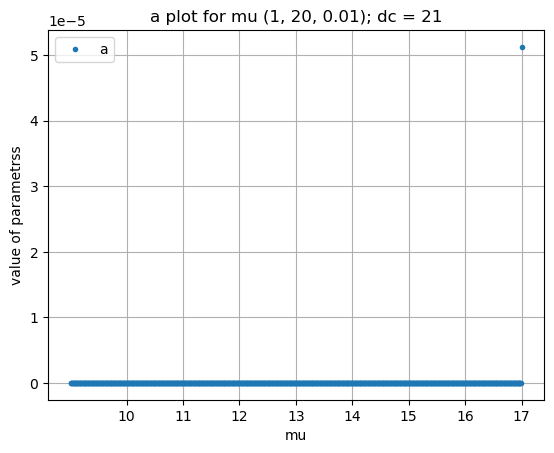

In [169]:
for i in range(0, 1):
    plt.xticks(mu[::100])
    plt.plot(mu, ans[:, i], marker = '.', linestyle=' ')
    plt.grid(True)
    plt.xlabel('mu')
    plt.ylabel('value of parametrss')
plt.legend(['a'])
plt.title(f'a plot for mu (1, 20, 0.01); dc = {dc}')

Text(0.5, 1.0, 'nu1 a plot for mu (1, 20, 0.01); dc = 21')

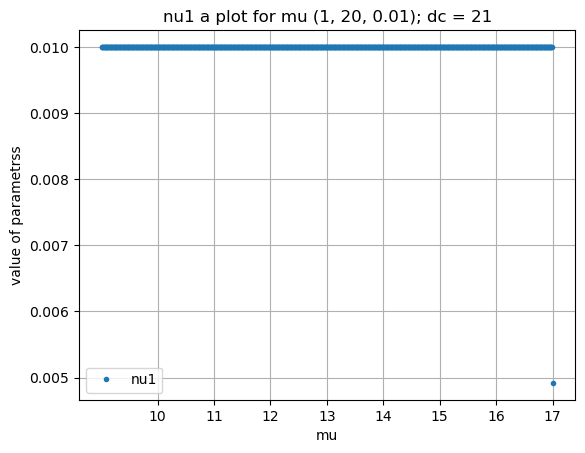

In [170]:
for i in range(1, 2):
    plt.xticks(mu[::100])
    plt.plot(mu, ans[:, i], marker = '.', linestyle=' ')
    plt.grid(True)
    plt.xlabel('mu')
    plt.ylabel('value of parametrss')
plt.legend(['nu1'])
plt.title(f'nu1 a plot for mu (1, 20, 0.01); dc = {dc}')

Text(0.5, 1.0, 'nu2 a plot for mu (1, 20, 0.01); dc = 21')

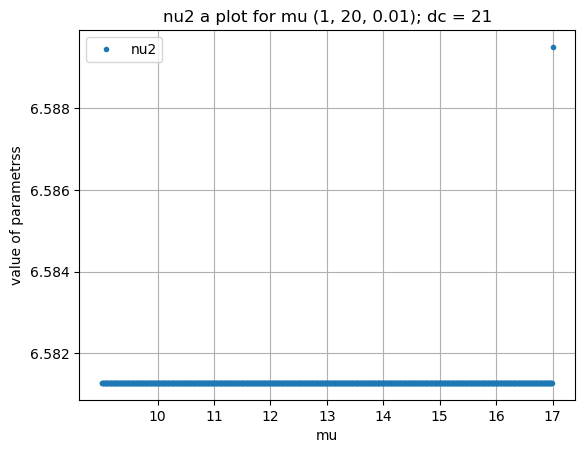

In [171]:
for i in range(2, 3):
    plt.xticks(mu[::100])
    plt.plot(mu, ans[:, i], marker = '.', linestyle=' ')
    plt.grid(True)
    plt.xlabel('mu')
    plt.ylabel('value of parametrss')
plt.legend(['nu2'])
plt.title(f'nu2 a plot for mu (1, 20, 0.01); dc = {dc}')

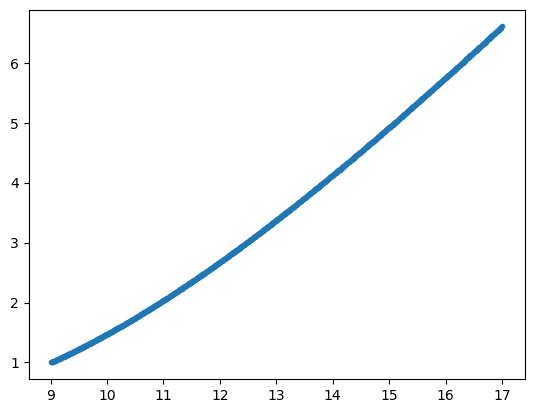

In [172]:
plt.plot(mu, ans_gauss, marker = '.', linestyle = ' ')

Text(0.5, 1.0, 'plot of diff gauss and model for 21')

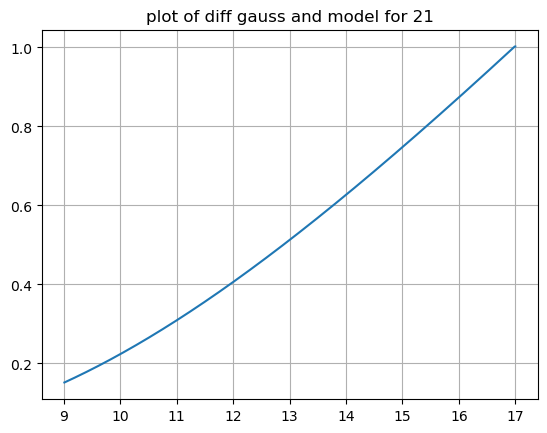

In [173]:
plt.plot(mu, ans_gauss / (ans[:, 0] * ans[:, 1] + (1 - ans[:, 0]) * ans[:, 2]))
plt.grid()
plt.title(f"plot of diff gauss and model for {dc}")

In [71]:
from scipy.stats import norm

def normal(x, mu = 0,sigma = 1):
    '''
    function for normal calculating density of normal distribution with given parametrs in the poiny
    '''
    return norm.pdf(x, loc = mu, scale = sigma)

In [72]:
import scipy

def iteration(dc, dv, sigma, epsilon, max_iteration, l, starting_point, a = 0, nu1 = 0.01, nu2 = 0):
    mu = 2 / (sigma ** 2) + (dv - 1) * (a * nu1 + (1 - a) * nu2)
    print(mu)
    print(quad(lambda x: normal(x), -np.inf, -np.sqrt(mu/2))[0])
    if l > max_iteration:
        return "didnt decode"
    elif quad(lambda x: normal(x), -np.inf, -np.sqrt(mu/2))[0] < epsilon:
        return "decoded"
    a_, b_, c_ = solver(f123, dc = dc, mu = mu,  starting_point = starting_point)
    a = 1/(1 + np.exp(-a_)) 
    b = 0.1/(1 + np.exp(-b_ * 10))
    c = np.exp(c_)
    c = max(c, 10e-6)
    starting_point = (a_, b_, c_)
    return iteration(dc = dc, dv = dv, sigma = sigma, epsilon = epsilon, 
              max_iteration = max_iteration, l = l+1, starting_point = starting_point, 
              a = a, nu1 = b, nu2 = nu2)
    
    

In [73]:
def mixture(x_arr, a, nu1, nu2):
    return [a * normal(x, nu1, np.sqrt(2 * nu1)) + (1 - a) * normal(x, nu2, np.sqrt(2 * nu2)) for x in x_arr]

In [74]:
def int_dc_2(x, y, sigma):
    if abs(x) < abs(y) and abs(y) < 1:
        tmp4 = np.log(2 * np.exp(-sigma/4) / (np.pi * sigma))
        tmp1 = np.log(np.abs(y))
        tmp2 = 4*np.log(abs(y-x))+(1/sigma*np.log((y+x)/(y-x))+1) * np.log((y+x)/(y-x))
        tmp3 = 4 * np.log(1 - y) + (1/sigma * np.log((1+y)/(1-y))+1)*np.log((1+y)/(1-y))
        return np.exp(tmp1 + (-1/2) * (tmp2 + tmp3) + tmp4)
    return 0

In [75]:
def pdf_(x_, sigma):
    return [quad(int_dc_2, -1, 1, args = (x, sigma))[0] for x in x_]

In [76]:
def pdf(x, sigma):
    return quad(int_dc_2, -1, 1, args = (x, sigma))[0]

In [77]:
def pdf_tanh(x, sigma):
    if abs(x) < 1:
        tmp1 = np.log((np.sqrt(2)) * np.exp(-sigma/8)/np.sqrt(np.pi * sigma))
        tmp2 = -2 * np.log(1 - x) - 1/2 * (1 + (1 / sigma) * np.log((1 + x) / (1 - x))) * np.log((1 + x)/(1-x))
        return np.exp(tmp1 + tmp2)
    return 0

In [78]:
def int_conv_dc_2(y, x, sigma):
    if y == 0:
        return 0
    else:
        return 1/np.abs(y) * pdf_tanh(x/y, sigma) * pdf_tanh(y, sigma)

In [79]:
def conv_dc_2(x, sigma):
    return quad(int_conv_dc_2, -1, 1, args = (x, sigma))[0]

In [80]:
def int_conv_dc_3(y, x, sigma):
    if y == 0:
        return 0
    else:
        return 1/np.abs(y) * conv_dc_2(x/y, sigma) * pdf_tanh(y, sigma)

In [81]:
from numba import jit

def conv_dc_3(x, sigma):
    return quad(int_conv_dc_3, -1, 1, args = (x, sigma))[0]

In [145]:
ans.shape

(1200, 3)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


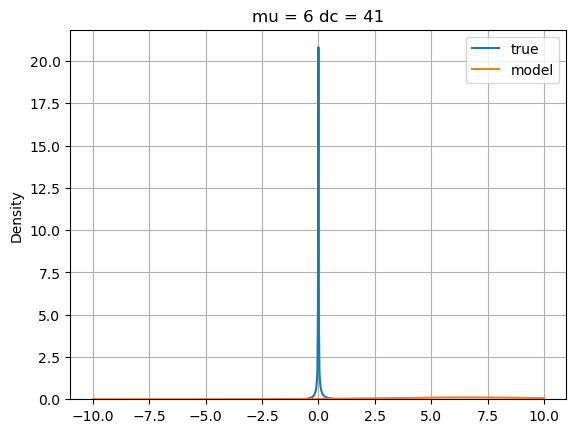

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


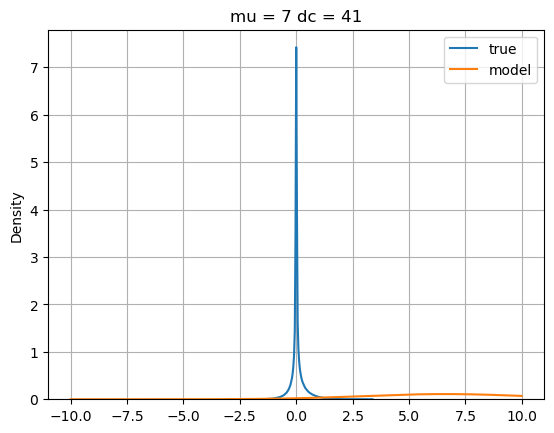

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


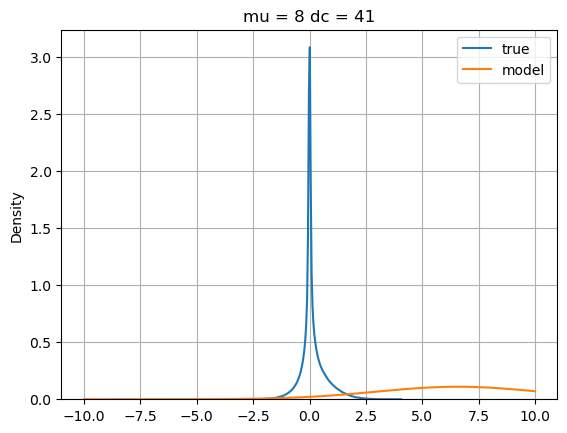

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


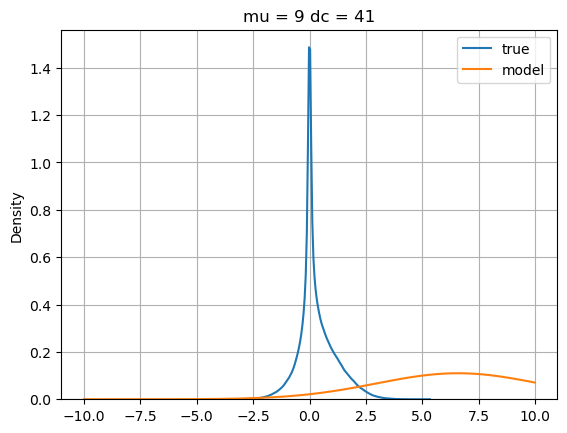

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


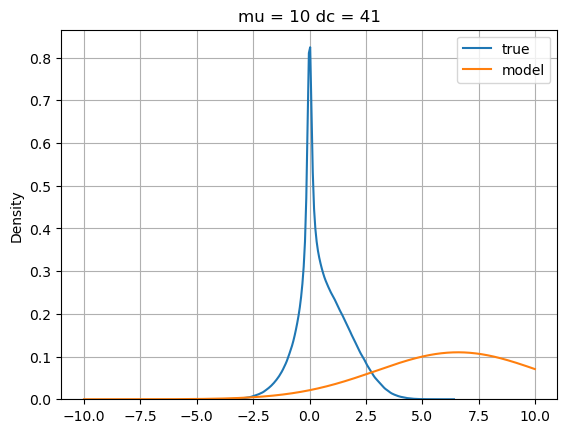

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


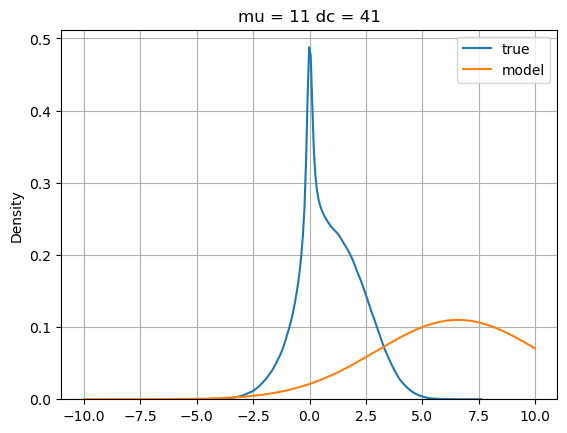

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


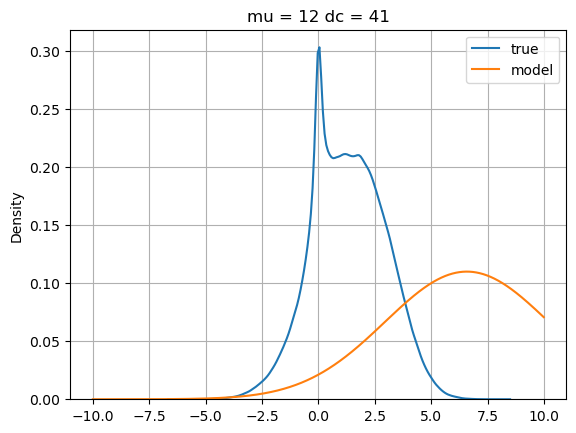

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


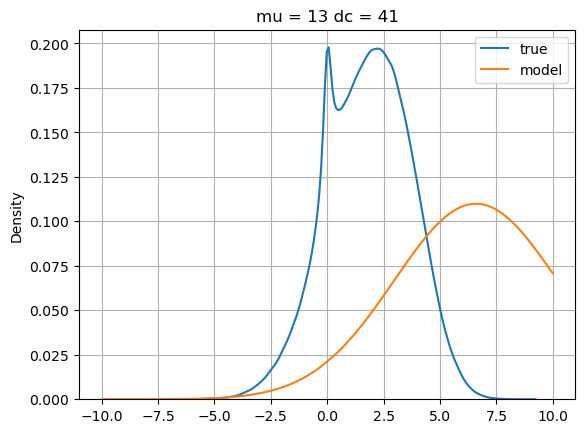

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


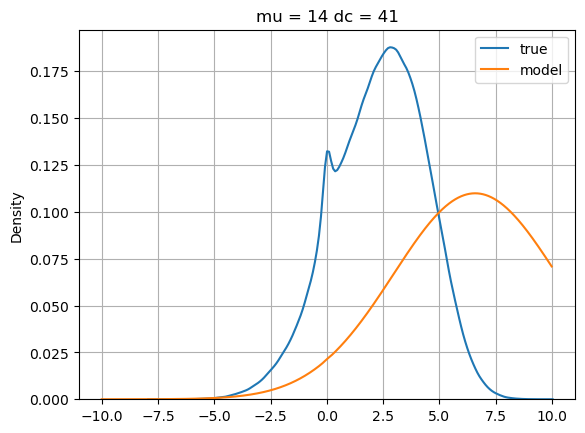

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


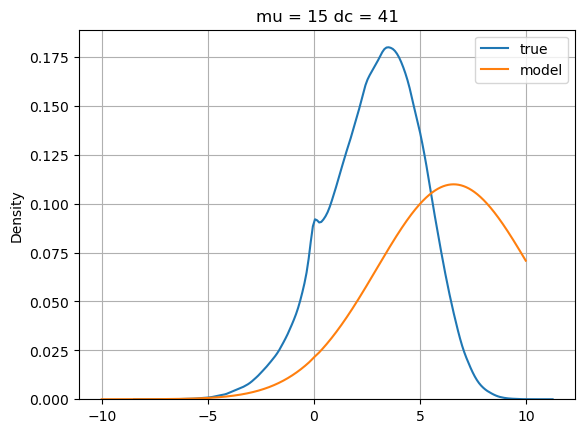

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


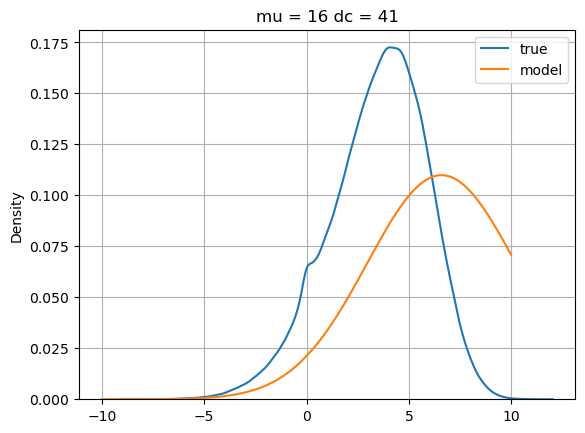

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


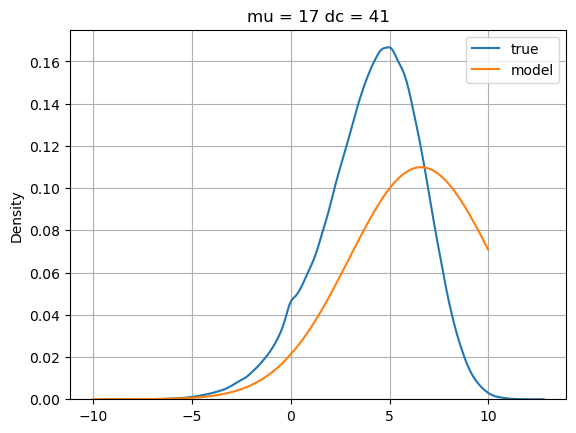

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


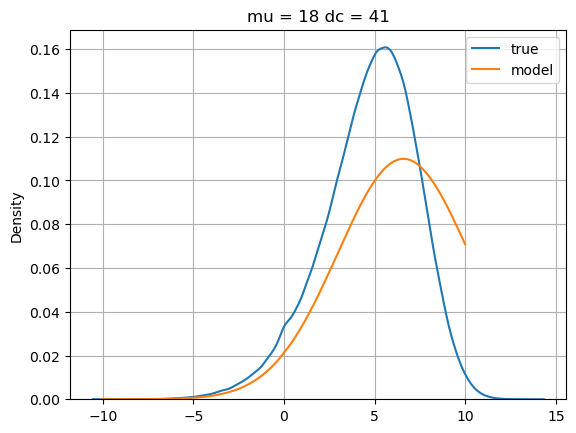

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


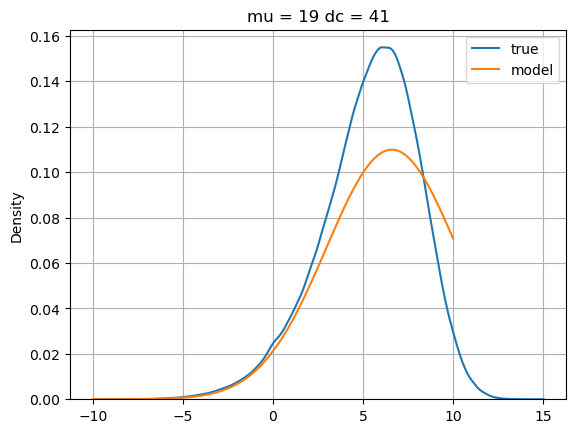

In [174]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dc = 41
shape = 1000000
x_ = np.arange(-10, 10, 0.01)
for mu in range(6, 20, 1):
    x = np.tanh(np.random.normal(mu, np.sqrt(2 * mu), shape) / 2)
    for i in range(dc - 2):
        x *= np.tanh(np.random.normal(mu, np.sqrt(2 * mu), shape) / 2)

    y = 2 * np.arctanh(x)
    sns.kdeplot(y).set(title=f'mu = {mu} dc = {dc}')
    index = max(1199 - 100 * (mu - 1), 0)
    y_1 = mixture(x_, ans[index][0], ans[index][1], ans[index][2])
    plt.plot(x_, y_1)
    plt.legend(['true', 'model'])
    plt.grid(True)
    plt.show()



(0.0, 0.5)

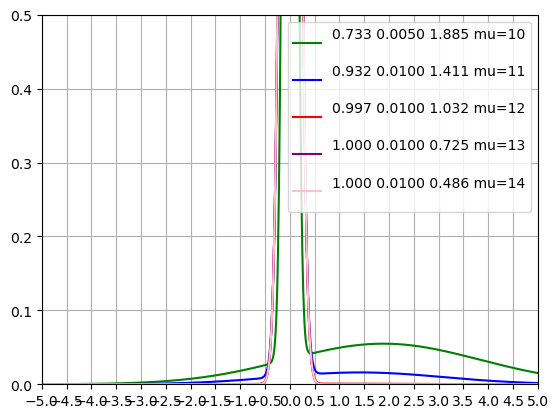

In [56]:
#sigma ** 2 = 1 / mu
x_ = np.arange(-10, 10, 0.01)
y_1 = mixture(x_, ans[0][0], ans[0][1], ans[0][2])
y_2 = mixture(x_, ans[99][0], ans[99][1], ans[99][2])
y_3 = mixture(x_, ans[199][0], ans[199][1], ans[199][2])
y_4 = mixture(x_, ans[299][0], ans[299][1], ans[299][2])
y_5 = mixture(x_, ans[399][0], ans[399][1], ans[399][2])
plt.plot(x_, y_1, color = 'green')
plt.plot(x_, y_2, color = 'blue')
plt.plot(x_, y_3, color = 'red')
plt.plot(x_, y_4, color = 'purple')

plt.plot(x_, y_5, color = 'pink')
#plt.plot(x_, y_4)
plt.legend([f'{ans[0][0]:.3f} {ans[0][1]:.4f} {ans[0][2]:.3f} mu=10\n', f'{ans[99][0]:.3f} {ans[99][1]:.4f} {ans[99][2]:.3f} mu=11\n', f'{ans[199][0]:.3f} {ans[199][1]:.4f} {ans[199][2]:.3f} mu=12\n', f'{ans[299][0]:.3f} {ans[299][1]:.4f} {ans[299][2]:.3f} mu=13\n', f'{ans[399][0]:.3f} {ans[399][1]:.4f} {ans[399][2]:.3f} mu=14\n'])
plt.xticks(x_[::50])
plt.xlim(-5, 5)
plt.grid(True)
plt.ylim(0, 0.5)

(0.0, 0.5)

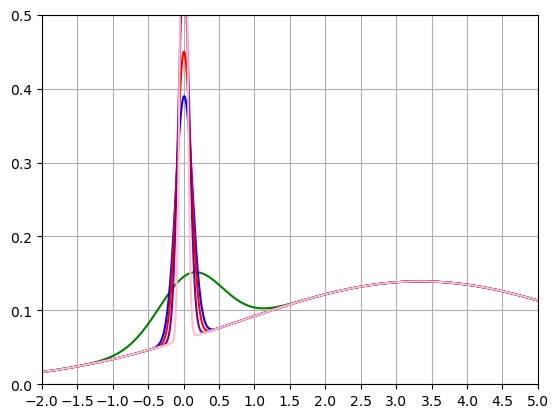

In [62]:
x_ = np.arange(-10, 10, 0.01)
y_1 = mixture(x_, ans[0][0], 0.1, ans[0][2])
y_2 = mixture(x_, ans[0][0], 0.007, ans[0][2])
y_3 = mixture(x_, ans[0][0], 0.005, ans[0][2])
y_4 = mixture(x_, ans[0][0], 0.003, ans[0][2])
y_5 = mixture(x_, ans[0][0], 0.001, ans[0][2])
plt.plot(x_, y_1, color = 'green')
plt.plot(x_, y_2, color = 'blue')
plt.plot(x_, y_3, color = 'red')
plt.plot(x_, y_4, color = 'purple')
plt.plot(x_, y_5, color = 'pink')
plt.xticks(x_[::50])
plt.xlim(-2, 5)
plt.grid(True)
plt.ylim(0, 0.5)

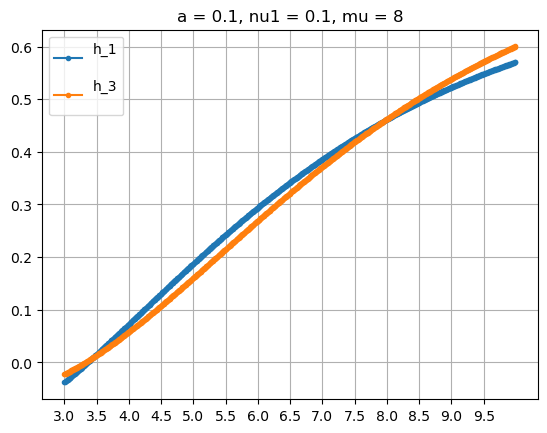

In [17]:
a_ = [0.001,0.01,0.1,0.3, 0.5, 0.7, 0.9]
b_ = [0.3, 0.1, 0.01, 0.001, 0.0001]
a = a_[2]
b = b_[1]
c = np.arange(3, 10, 0.01)
mu = 8
dc = 6
res = np.zeros((len(c), 2))
for i in range(len(c)):
    num = const_gen(mu, dc)
    res[i] = np.array([a * h_1(b, dc) + (1 - a) * h_1(c[i], dc) - num[0], 
                    a * h_3(b, dc) + (1 - a) * h_3(c[i], dc) - num[1]])
for i in range(2):
    plt.xticks(c[::50])
    plt.grid(True)
    plt.plot(c, res[:, i], marker = ".")
    plt.legend(['h_1\n', 'h_3\n'])
    plt.title(f"a = {a}, nu1 = {b}, mu = {mu}")